# 95% - the first integration step in 3.1 is not correct;

#3.1 Assignment


#Kg= gas conductance

#spherical distribution A(x)= 4pix^2

#displaystyle: gives bigger integral size

#\dfrac: this is for a display-style fraction

#\int: command for an integral symbol.



equ (3.7)Kg: $\dfrac{D_g} {\displaystyle\int_{x_1}^{x_2} {\dfrac{\mathrm{d}x}{A(x)}}} $

Kg: $ \dfrac{D_g}{\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{4 \pi x^2}} $

Kg: $ \dfrac{D_g}{\dfrac{1}{4\pi}\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x^2}} $

Kg: $\dfrac{D_g}{\dfrac{1}{4\pi} * -(x^{-2}+1)}$

Kg: $ \dfrac{D_g} {\dfrac{1}{4\pi} * (\dfrac{x_2}{x_1*x_2} - \dfrac{x_1}{x_1*x_2})} $


 (Equation 3.10) Kg: $\dfrac{4 * \pi * D_g * x_1 *x_2}{x_2-x_1} $



equ (3.7) Kg: $\dfrac{D_g}{\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{A(x)}} $

Kg: $ \dfrac{D_g}{ \displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{2 \pi  x}} $

Kg: $ \dfrac{D_g}{\dfrac{1}{2\pi}\displaystyle\int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x}} $

Kg: $ \dfrac{D_g}{\dfrac{1}{2\pi}*(\ln{x_2}-\ln{x_1})}  $

(Equation 3.11) Kg: $ \dfrac{2*\pi*D_g}{\ln{(x_2/x_1)}} $



when bulk density increased from 1200 t0 1450 gas porosity decreased from 0.35 to  0.25, O2 concentration is greater than 15% and CO2 concentration is less than 5%

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.208       0.002
  3      0.05      0.206       0.004
  4      0.08      0.204       0.006
  5      0.10      0.203       0.007
  6      0.12      0.201       0.009
  7      0.15      0.200       0.010
  8      0.17      0.199       0.011
  9      0.20      0.198       0.012
 10      0.22      0.197       0.013
 11      0.25      0.197       0.013
 12      0.27      0.196       0.014
 13      0.30      0.195       0.015
 14      0.33      0.195       0.015
 15      0.35      0.195       0.015
 16      0.38      0.194       0.016
 17      0.40      0.194       0.016
 18      0.43      0.194       0.016
 19      0.45      0.194       0.016
 20      0.48      0.194       0.016
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.38


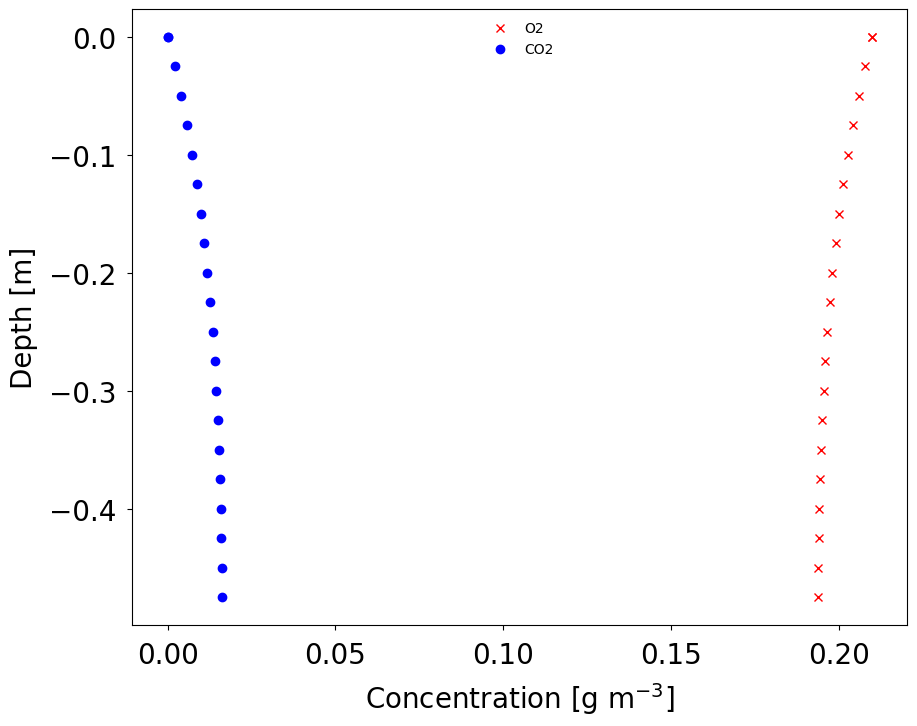

In [ ]:
#3.2
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1100.            #changed from 1200 to 1100 kg/m3
    particleDensity = 2650.
    waterContent = 0.2
    respRate = -0.001
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.01
    volumeFrac_O2 = 0.21
    bg = 0.9
    mg = 2.3

    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
     #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))

 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)

    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14

    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2,
                      dg_O2, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2

    pco2 = 0.21 - po           #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'bo')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

when bulk density decreased from 1200 to 900 gas porosity decreased from 0.35 to 0.46, O2 concentration is greater than .20 and CO2 concentration near to 0.00

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.204       0.006
  3      0.05      0.199       0.011
  4      0.08      0.194       0.016
  5      0.10      0.190       0.020
  6      0.12      0.186       0.024
  7      0.15      0.183       0.027
  8      0.17      0.180       0.030
  9      0.20      0.177       0.033
 10      0.22      0.175       0.035
 11      0.25      0.173       0.037
 12      0.27      0.171       0.039
 13      0.30      0.170       0.040
 14      0.33      0.169       0.041
 15      0.35      0.168       0.042
 16      0.38      0.167       0.043
 17      0.40      0.166       0.044
 18      0.43      0.166       0.044
 19      0.45      0.166       0.044
 20      0.48      0.165       0.045
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.25


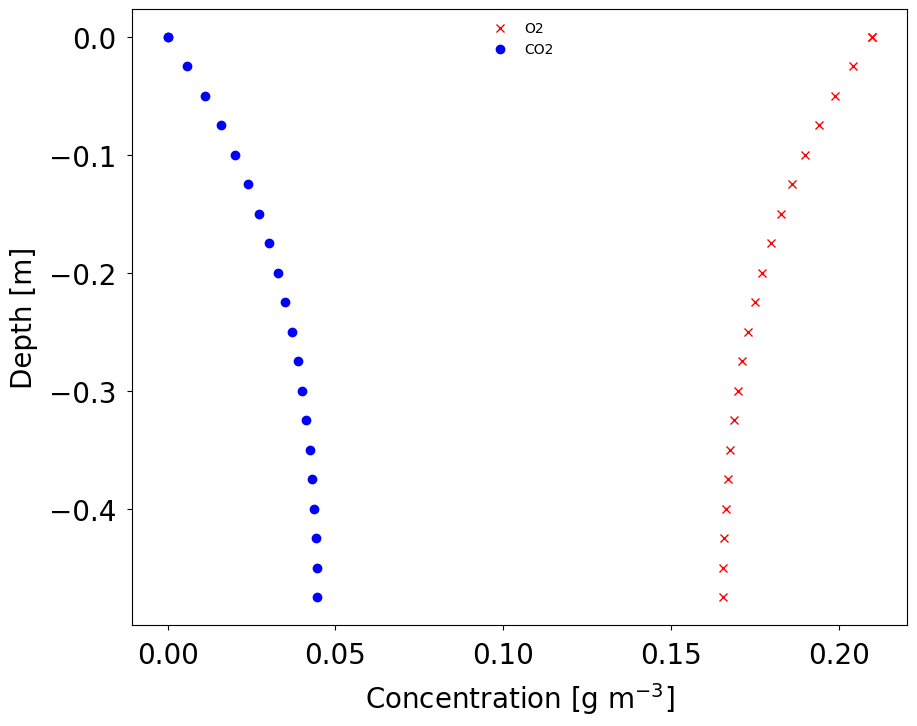

In [ ]:
#3.2
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1200.
    particleDensity = 2650.
    waterContent = 0.3 #change from 0.2 to 0.3
    respRate = -0.001
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.01
    volumeFrac_O2 = 0.21
    bg = 0.9
    mg = 2.3

    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
     #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))

 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)

    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14

    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2,
                      dg_O2, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2

    pco2 = 0.21 - po           #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'bo')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

when water content was reduced increased from 0.2 to 0.31 the CO2 concentration was near to 0.05, so I changed to 0.3 and CO2 is less than 0.05. While the gas porosity is 0.25

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.207       0.003
  3      0.05      0.205       0.005
  4      0.08      0.203       0.007
  5      0.10      0.201       0.009
  6      0.12      0.199       0.011
  7      0.15      0.197       0.013
  8      0.17      0.196       0.014
  9      0.20      0.195       0.015
 10      0.22      0.194       0.016
 11      0.25      0.193       0.017
 12      0.27      0.192       0.018
 13      0.30      0.191       0.019
 14      0.33      0.191       0.019
 15      0.35      0.190       0.020
 16      0.38      0.190       0.020
 17      0.40      0.190       0.020
 18      0.43      0.190       0.020
 19      0.45      0.189       0.021
 20      0.48      0.189       0.021
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.35


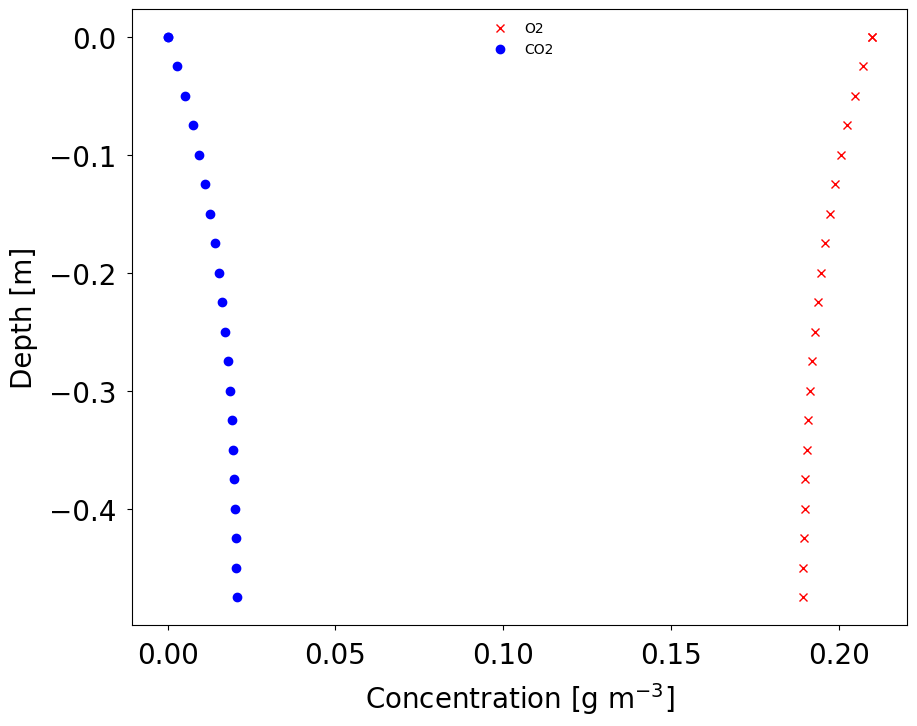

In [ ]:
#3.2
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1200.
    particleDensity = 2650.
    waterContent = 0.2
    respRate = -0.001
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.001  #change from 0.01 to 0.001
    volumeFrac_O2 = 0.21
    bg = 0.9
    mg = 2.3

    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
     #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))

 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)

    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14

    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2,
                      dg_O2, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2

    pco2 = 0.21 - po           #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'bo')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

When boundary layer conducatnce was change from 0.01 to 0.00000001, then concentration of CO2 was greater than 20 gm^-3, while O2 concentration was less than -15 gm6-2. but the gas filled porosity didot change. So, the boundary layer conductance was change to 0.001 only.

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.204       0.006
  3      0.05      0.199       0.011
  4      0.08      0.194       0.016
  5      0.10      0.190       0.020
  6      0.12      0.186       0.024
  7      0.15      0.183       0.027
  8      0.17      0.180       0.030
  9      0.20      0.177       0.033
 10      0.22      0.175       0.035
 11      0.25      0.173       0.037
 12      0.27      0.171       0.039
 13      0.30      0.170       0.040
 14      0.33      0.168       0.042
 15      0.35      0.168       0.042
 16      0.38      0.167       0.043
 17      0.40      0.166       0.044
 18      0.43      0.166       0.044
 19      0.45      0.165       0.045
 20      0.48      0.165       0.045
 21      0.50      0.000       0.210
gas-filled porosity
0.25


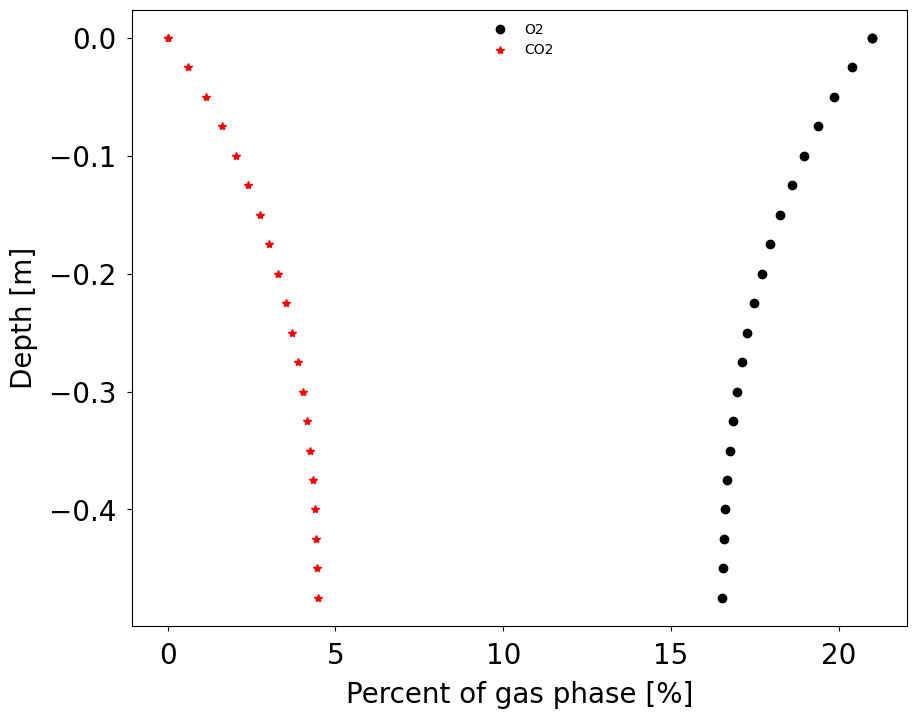

In [ ]:
#3.3
#PSP_gasDiffusion
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryOxygenConc, dg,
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)
    b  = np.zeros(n+2, float)
    c  = np.zeros(n+2, float)
    d  = np.zeros(n+2, float)
    g  = np.zeros(n+2, float)
    u  = np.zeros(n+2, float)
    co = np.zeros(n+2, float)

    g[0] = boundaryLayerCond
    co[0] = boundaryOxygenConc
    # vector depth [m]
    z = grid.linear(n, totalDepth)

    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg / (z[i + 1] - z[i])
        else:
            g[i] = 0 #no flux at the bottom so g(i)=0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]

    ThomasBoundaryCondition(a, b, c, d, co, 1, n)

    return(z, co)


def main():
    R = 8.3143
    n = 20
    totalDepth = 0.5
    bulkDensity = 1200.
    particleDensity = 2650.
    waterContent = 0.3      #change from 0.2 to 0.3
    respRate = -0.001
    oxygenDiff = 1.77e-5  #this is the value for oxygen
    temperature = 25.
    atmPressure = 101.3
    boundaryLayerCond = 0.001    #changed from 0.01 to 0.001

    # O2 concentration in air [g/m^3]
    #.21 is partial pressure of oxygen
    #equation 3.15
    boundaryOxygenConc = (0.21 * atmPressure * 1000. * 32. /
                          (R * (temperature + 273.15)))
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent

    #  binary diffusion coefficient [m2/s]
    #101.3 written here is standard atm pressure
    binaryDiffCoeff = (oxygenDiff * (101.3 / atmPressure)
                * ((temperature + 273.15) / 273.15)**1.75)

    bg = 0.9
    mg = 2.3
    dg = binaryDiffCoeff * bg * gasPorosity**mg

    z, co = gasSolver(boundaryLayerCond, boundaryOxygenConc,
                      dg, respRate, totalDepth, n)

    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.) # partial pressure of O2

    pco2 = 0.21 - po #partial pressure of CO2 assuming recipirocal relationship

    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity")
    print("%.2f" %(gasPorosity))

    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(100*po[i], -z[i], 'ko', 100*pco2[i], -z[i], 'r*')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)
    plt.xlabel('Percent of gas phase [%]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

With  bulk density 1200, water content 0.3, anf boundary layer conductance 0.001.
At 0.23 gas filled porosity O2 will be greater than 15% but, CO2 will also be greater than 5%.
At 0.25 gas filled porosity, both CO2 less than 5% and O2 greater than 15%


In [ ]:
#code doesnot run if watercontent is more than 0.6 with bulk density 1200.